In [42]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
from tqdm import tqdm,tqdm_notebook
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import Dataset,DataLoader
import matplotlib
import matplotlib.pyplot as plt
from torch import nn ,optim
from torch.utils import data
import cv2

In [43]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))])

data_set = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [44]:
train , val , test = data.random_split(data_set , [50_000,5_000,5_000])
train_loader = DataLoader( train , batch_size = 64 , shuffle = True)
test_loader  = DataLoader( test , batch_size = 64 , shuffle = True)
val_loader   = DataLoader( val , batch_size = 64 , shuffle = True)

## The data


Text(0.5, 1.0, 'Label is 5')

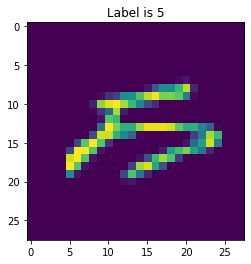

In [45]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
plt.imshow(images[0].view(28,28))
plt.title(f"Label is {labels[0]}")

### Model

In [46]:
model = nn.Sequential(nn.Linear(784,100),
                     nn.ReLU(),
                     nn.Linear(100,64),nn.Dropout( p=0.2),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1),)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.003)

###  Accuracy without training

In [40]:
model.eval()
with torch.no_grad():
    a_count = 0
    a_total = 0
    for images,labels in test_loader:
        prediction = model(images.view(images.shape[0],-1))
        pred_names = torch.argmax(prediction,dim=1)
        for each_prediction,each_label in zip(pred_names,labels):
            if each_prediction == each_label:
                a_count +=1 
            a_total +=1

print(f"The accuracy of the model is : {a_count*100/a_total}")   

The accuracy of the model is : 13.58


### Training the model

In [47]:
epochs = 15
training_loss_a = []
accuracy_a = []
for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        output = model.forward(images)
        
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        running_loss = running_loss + loss.item()
    
    with torch.no_grad():
        a_count = 0
        a_total = 0
        for images,labels in val_loader:
            images = images.view(images.shape[0],-1)
            output = model.forward(images)
            pred_names = torch.argmax(output,dim=1)
            for each_prediction,each_label in zip(pred_names,labels):
                if each_prediction == each_label:
                    a_count +=1 
                a_total +=1
    print(f"Training loss : {running_loss/len(trainloader):.5f} , Accuracy : {(a_count*100/a_total):.5f}")
    training_loss_a.append(running_loss/len(trainloader))
    accuracy_a.append(a_count*100/a_total)       

Training loss : 1.88171 , Accuracy : 67.00000
Training loss : 0.89094 , Accuracy : 79.24000
Training loss : 0.60452 , Accuracy : 82.64000
Training loss : 0.50523 , Accuracy : 85.40000
Training loss : 0.45411 , Accuracy : 85.72000
Training loss : 0.42354 , Accuracy : 86.76000
Training loss : 0.40206 , Accuracy : 87.78000
Training loss : 0.38163 , Accuracy : 88.78000
Training loss : 0.36832 , Accuracy : 88.82000
Training loss : 0.35234 , Accuracy : 89.18000
Training loss : 0.34218 , Accuracy : 88.92000
Training loss : 0.33329 , Accuracy : 89.98000
Training loss : 0.32353 , Accuracy : 89.66000
Training loss : 0.31370 , Accuracy : 90.02000
Training loss : 0.30650 , Accuracy : 90.68000


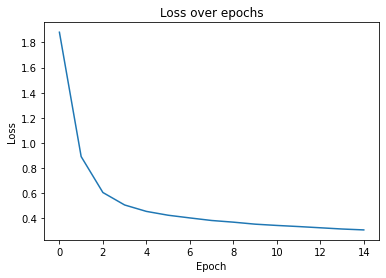

In [48]:
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(list(range(epochs)),training_loss_a)

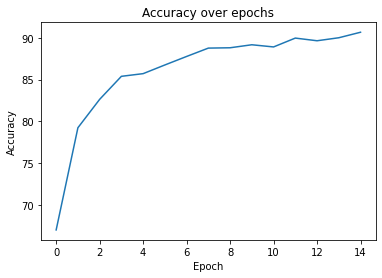

In [49]:
plt.title("Accuracy over epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.plot(list(range(epochs)),accuracy_a)

### Accuracy 


In [50]:
model.eval()
with torch.no_grad():
    a_count = 0
    a_total = 0
    for images,labels in test_loader:
        prediction = model(images.view(images.shape[0],-1))
        pred_names = torch.argmax(prediction,dim=1)
        for each_prediction,each_label in zip(pred_names,labels):
            if each_prediction == each_label:
                a_count +=1 
            a_total +=1

print(f"The accuracy of the model is : {a_count*100/a_total}")   

The accuracy of the model is : 92.5


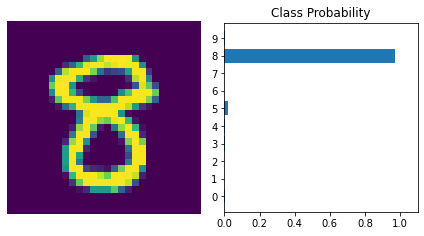

In [51]:
%matplotlib inline
import helper

dataiter = iter(test_loader)
images, labels = next(dataiter)
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)

helper.view_classify(img.view(1, 28, 28), ps)